In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import sys
import os

In [3]:
benin_path = "../data/benin-malanville_clean.csv"
togo_path = "../data/togo-dapaong_qc_clean.csv" 
sierra_path = "../data/sierraleone-bumbuna_clean.csv"

In [4]:
benin = pd.read_csv(benin_path)
togo = pd.read_csv(togo_path)
sierra = pd.read_csv(sierra_path)

In [7]:
benin['Country'] = 'Benin'
togo['Country'] = 'Togo'
sierra['Country'] = 'Sierra Leone'

# Combine into a single dataframe
df = pd.concat([benin, togo, sierra], ignore_index=True)

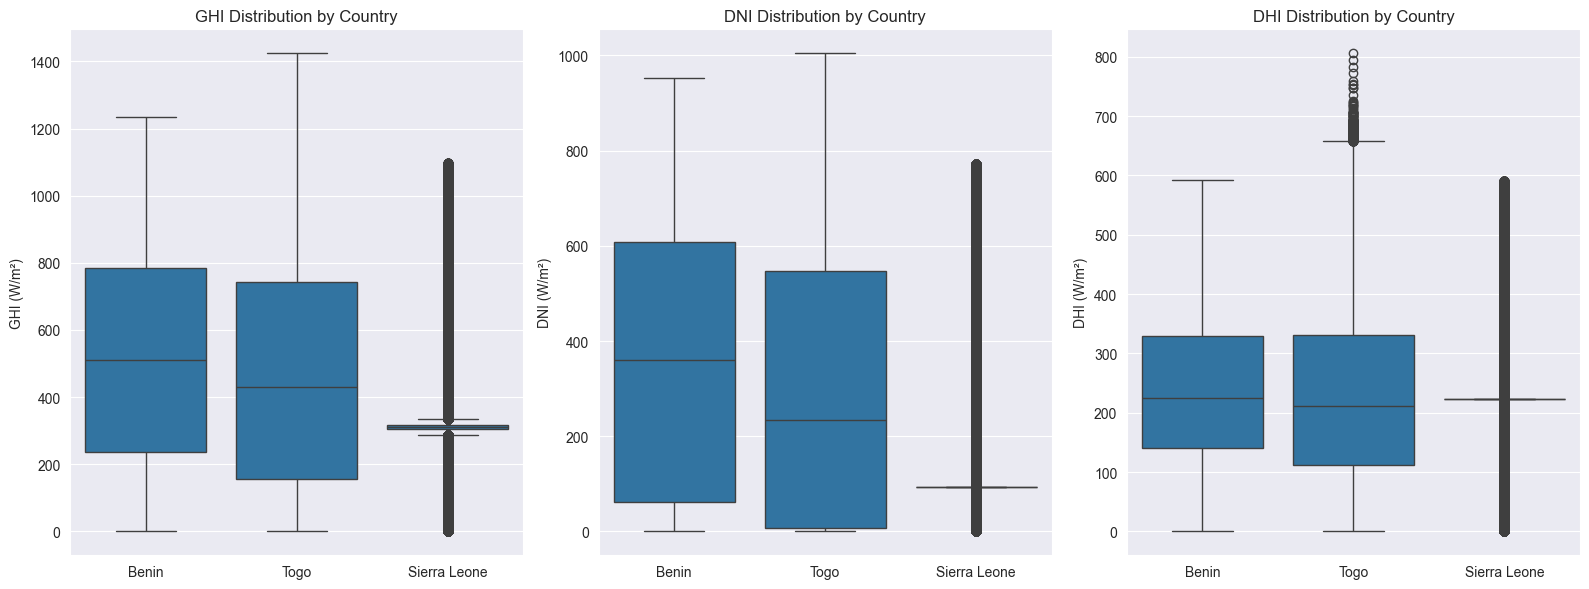

In [8]:
irradiance_cols = ['GHI', 'DNI', 'DHI']
plt.figure(figsize=(16, 6))

for i, col in enumerate(irradiance_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='Country', y=col, data=df)
    plt.title(f'{col} Distribution by Country')
    plt.ylabel(f'{col} (W/m²)')
    plt.xlabel('')

plt.tight_layout()
plt.show()


In [9]:
summary = df.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std'])
print(summary)


                     GHI                            DNI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         508.390773  510.6  304.156812  358.814015  359.3  280.159803   
Sierra Leone  335.039034  310.7  209.689702  151.211814   94.1  177.463071   
Togo          454.081218  430.3  319.096010  296.409415  233.8  283.534417   

                     DHI                     
                    mean median         std  
Country                                      
Benin         241.520069  225.2  136.278285  
Sierra Leone  225.093153  223.0   98.968399  
Togo          228.166180  211.4  150.064955  


In [10]:
from scipy.stats import f_oneway

f_stat, p_val = f_oneway(
    benin['GHI'].dropna(),
    togo['GHI'].dropna(),
    sierra['GHI'].dropna()
)

print("ANOVA Result:")
print(f"F-statistic: {f_stat:.2f}, p-value: {p_val:.5f}")


ANOVA Result:
F-statistic: 41236.62, p-value: 0.00000


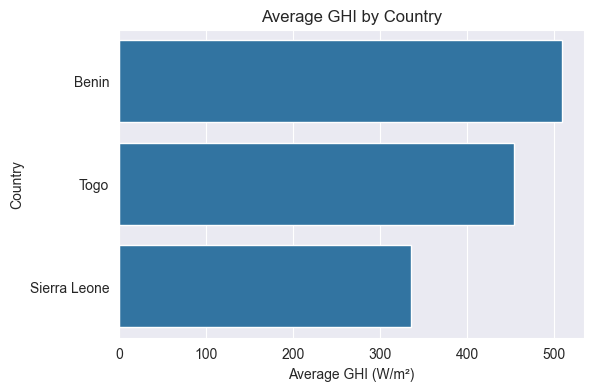

In [19]:
avg_ghi = df.groupby('Country')['GHI'].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=avg_ghi.values, y=avg_ghi.index)
plt.title('Average GHI by Country')
plt.xlabel('Average GHI (W/m²)')
plt.show()


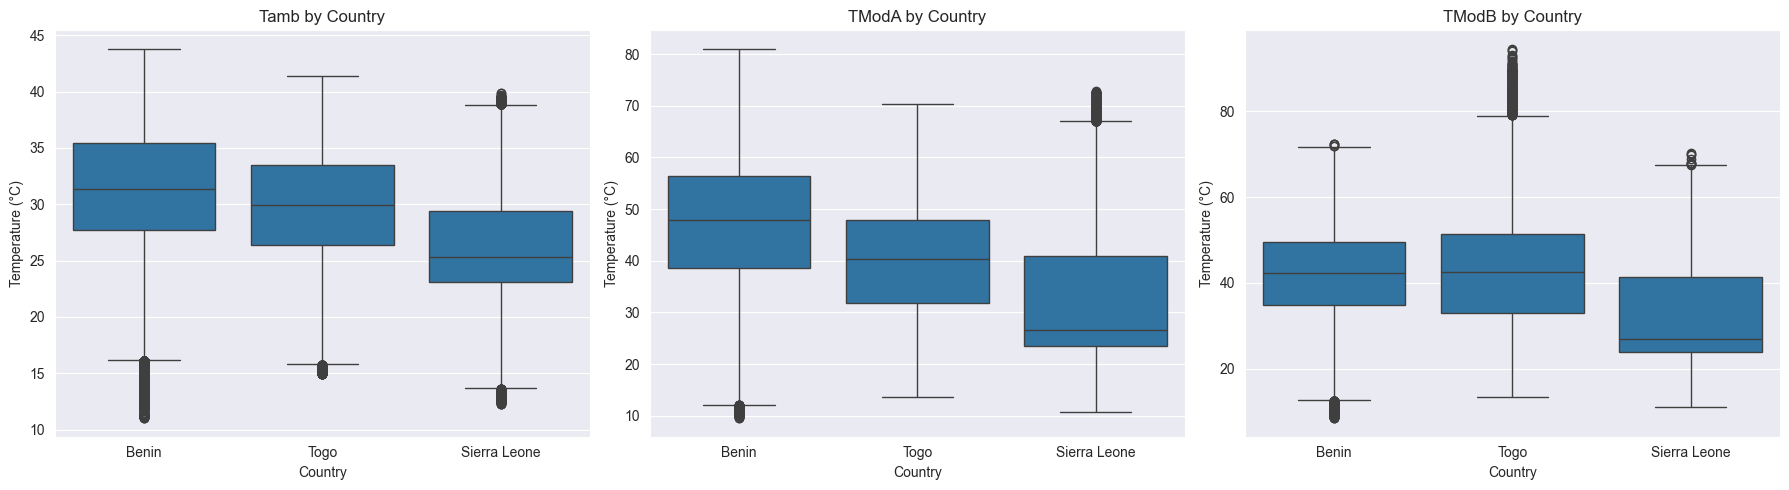

In [12]:
temp_cols = ['Tamb', 'TModA', 'TModB']

plt.figure(figsize=(18, 5))
for i, col in enumerate(temp_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='Country', y=col, data=df)
    plt.title(f'{col} by Country')
    plt.ylabel('Temperature (°C)')

plt.tight_layout()
plt.show()


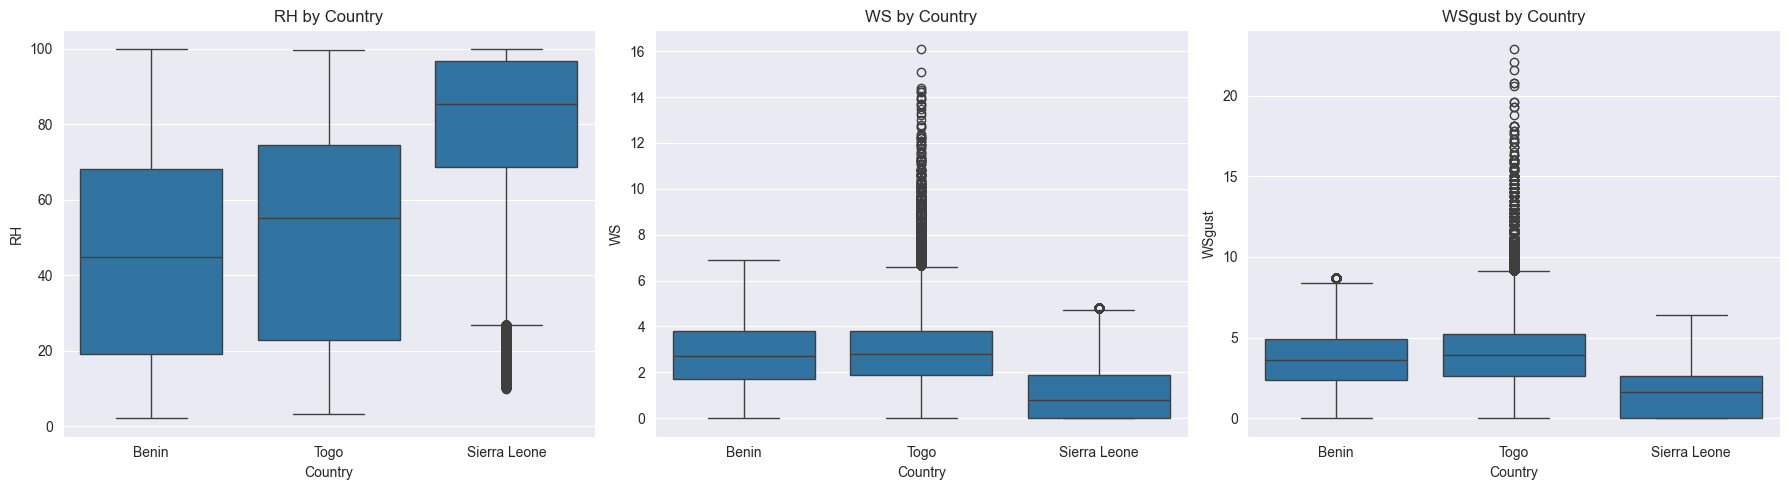

In [13]:
weather_cols = ['RH', 'WS', 'WSgust']

plt.figure(figsize=(18, 5))
for i, col in enumerate(weather_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='Country', y=col, data=df)
    plt.title(f'{col} by Country')

plt.tight_layout()
plt.show()


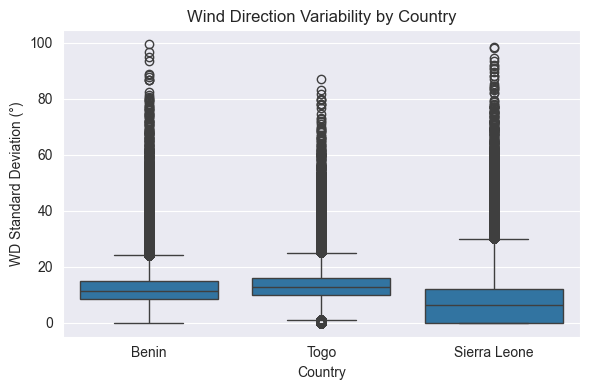

In [15]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Country', y='WDstdev', data=df)
plt.title("Wind Direction Variability by Country")
plt.ylabel("WD Standard Deviation (°)")
plt.tight_layout()
plt.show()


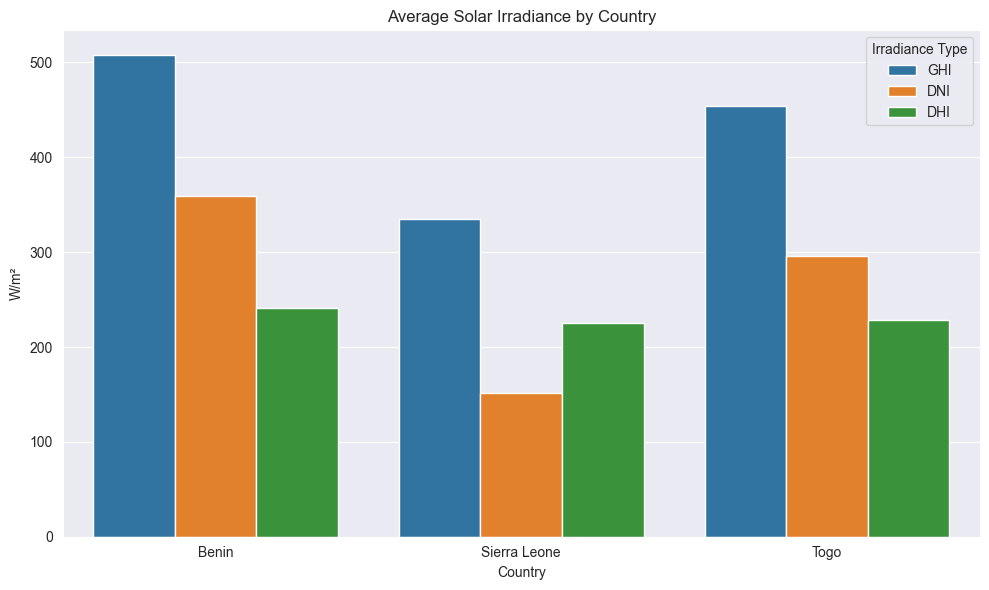

In [16]:
irradiance_avg = df.groupby('Country')[['GHI', 'DNI', 'DHI']].mean().reset_index()

irradiance_avg_melted = irradiance_avg.melt(id_vars='Country', var_name='Irradiance Type', value_name='Average Value')

plt.figure(figsize=(10, 6))
sns.barplot(data=irradiance_avg_melted, x='Country', y='Average Value', hue='Irradiance Type')
plt.title('Average Solar Irradiance by Country')
plt.ylabel('W/m²')
plt.tight_layout()
plt.show()


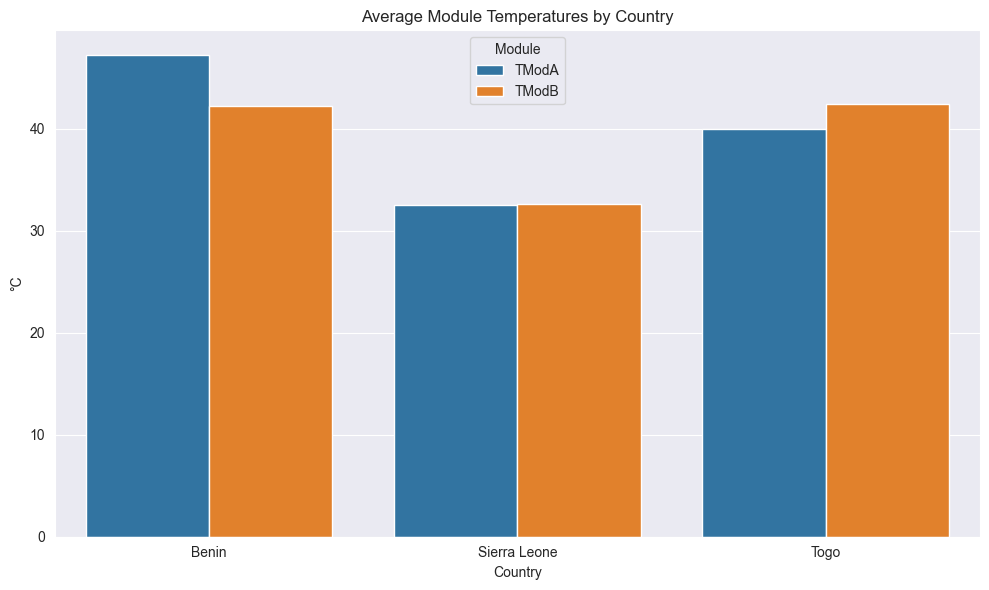

In [17]:
mod_temp_avg = df.groupby('Country')[['TModA', 'TModB']].mean().reset_index()
mod_temp_melted = mod_temp_avg.melt(id_vars='Country', var_name='Module', value_name='Temperature')

plt.figure(figsize=(10, 6))
sns.barplot(data=mod_temp_melted, x='Country', y='Temperature', hue='Module')
plt.title('Average Module Temperatures by Country')
plt.ylabel('°C')
plt.tight_layout()
plt.show()
